In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
from sklearn import preprocessing

In [2]:
dt = pd.read_csv('merged_data/merged.csv')

In [3]:
dt['created_at_x'] = pd.to_datetime(dt['created_at_x'])

In [4]:
dt = dt.sort_values(by=['created_at_x'])

In [5]:
rejected = dt[dt['sub_result'] == 'rejected']
temp = rejected.groupby(pd.Grouper(key='created_at_x', freq='D'))['sub_result'].count().reset_index(name='count').sort_values(['count'], ascending=False)

In [6]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 126 to 134
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   created_at_x  147 non-null    datetime64[ns, UTC]
 1   count         147 non-null    int64              
dtypes: datetime64[ns, UTC](1), int64(1)
memory usage: 3.4 KB


In [7]:
df = temp['count']

def minmax_norm(df):
    return (df - df.min()) / ( df.max() - df.min())

df_minmax_norm = minmax_norm(df)

print(df_minmax_norm)

126    1.000000
127    0.996904
119    0.944272
128    0.876161
133    0.825077
         ...   
11     0.000000
12     0.000000
13     0.000000
27     0.000000
134    0.000000
Name: count, Length: 147, dtype: float64


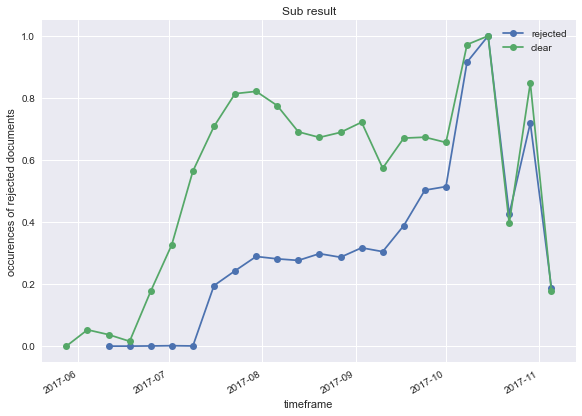

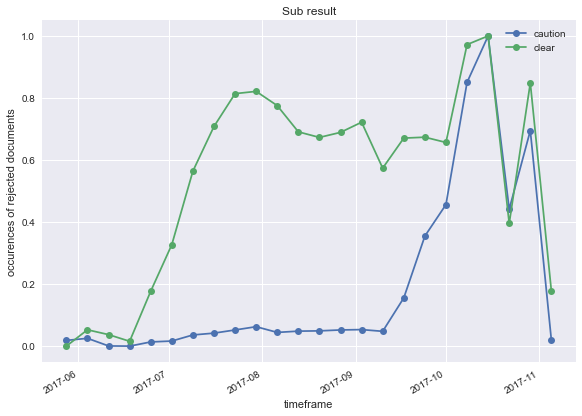

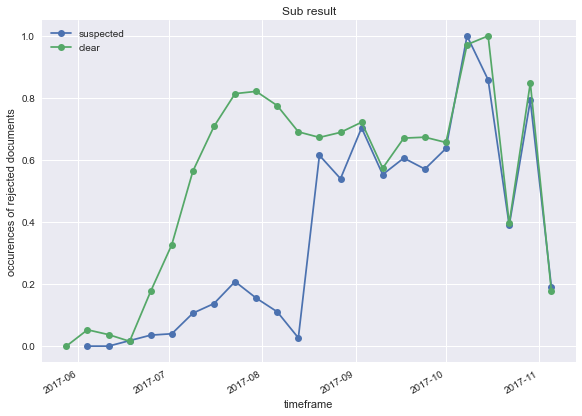

In [24]:
#test
r = ['rejected', 'clear']
c = ['caution', 'clear']
s = ['suspected', 'clear']

a = [r,c,s]
#result_variables = ['rejected', 'caution', 'suspected', 'clear']

for result_variables in a:
    counter = 1
    for result in result_variables:
        counter = counter + 1
        rejected = dt[dt['sub_result'] == result]
        temp = rejected.groupby(pd.Grouper(key='created_at_x', freq='W'))['sub_result'].count().reset_index(name='count').sort_values(['count'],ascending=False)
        temp.sort_values(by=['created_at_x'], inplace=True)
        created_at = temp['created_at_x']
        count = minmax_norm(temp['count'])


        plt.style.use('seaborn')
        plt.plot_date(created_at, count, linestyle='solid', label=result)
        plt.legend()
        plt.gcf().autofmt_xdate()

    plt.tight_layout()
    plt.title('Sub result')
    plt.xlabel('timeframe')
    plt.ylabel('occurences of rejected documents')
    plt.show()

In [26]:
plt.close('all')

In [21]:
def plot_timeframe(x_label, y_label, title_, created_at, count, label):
    plt.plot_date(created_at, count, linestyle='solid', label=label)
    plt.style.use('seaborn')
    plt.title(title_)
    plt.xlabel(created_at)
    plt.ylabel(count)
    plt.gcf().autofmt_xdate()
    plt.tight_layout()

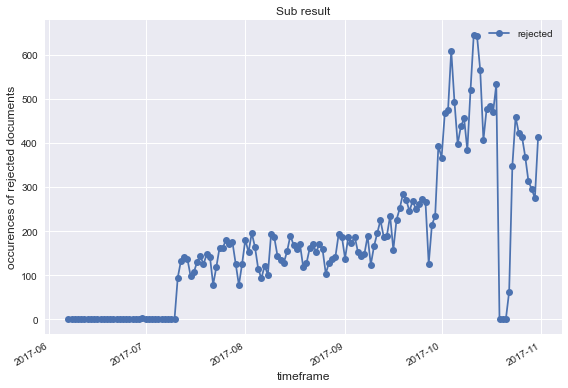

In [23]:
# provide awareness 
rejected = dt[dt['sub_result'] == 'rejected']
temp = rejected.groupby(pd.Grouper(key='created_at_x', freq='D'))['sub_result'].count().reset_index(name='count').sort_values(['count'],ascending=False)

temp.sort_values(by=['created_at_x'], inplace=True)
created_at = temp['created_at_x']
count = temp['count']

plt.plot_date(created_at, count, linestyle='solid', label='rejected')
plt.style.use('seaborn')
plt.title('Sub result')
plt.xlabel('timeframe', fontsize=12)
plt.ylabel('occurences of rejected documents', fontsize=12)
plt.legend()
plt.gcf().autofmt_xdate()
plt.tight_layout()

plt.show()




In [14]:
temp.loc[0,'created_at'].

TypeError: 'int' object is not callable

In [9]:
temp.loc[0, 'created_at']

Timestamp('2017-07-16 19:19:39+0000', tz='UTC')